In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
train_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_x_300_30.npy")
train_data_y = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_y.npy")
test_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\test_x_300_30.npy")

###  using Keras Dense with SGD optimizer

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Dense(600,input_dim=300, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(400, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.6, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(train_data_x, train_data_y,
          epochs=10, shuffle= True,
          batch_size=128, validation_split=0.2)

model.evaluate(train_data_x, train_data_y, batch_size=128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 132us/step - loss: 0.4277 - acc: 0.8067 - val_loss: 0.3314 - val_acc: 0.8620
Epoch 2/10
20000/20000 [==============================] - 2s 114us/step - loss: 0.3280 - acc: 0.8640 - val_loss: 0.3284 - val_acc: 0.8630
Epoch 3/10
20000/20000 [==============================] - 2s 114us/step - loss: 0.3118 - acc: 0.8689 - val_loss: 0.3734 - val_acc: 0.8404
Epoch 4/10
20000/20000 [==============================] - 2s 93us/step - loss: 0.3060 - acc: 0.8729 - val_loss: 0.3296 - val_acc: 0.8624
Epoch 5/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.3015 - acc: 0.8747 - val_loss: 0.3207 - val_acc: 0.8632
Epoch 6/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.2949 - acc: 0.8770 - val_loss: 0.3020 - val_acc: 0.8730
Epoch 7/10
20000/20000 [==============================] - ETA: 0s - loss: 0.2901 - acc: 0.880 - 1s 63us/step - loss: 0.2905 - 

[0.26524447052001954, 0.89208]

### draw ROC curve

In [5]:
from sklearn.metrics import roc_curve
y_pred = model.predict(train_data_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_data_y, y_pred)

In [6]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

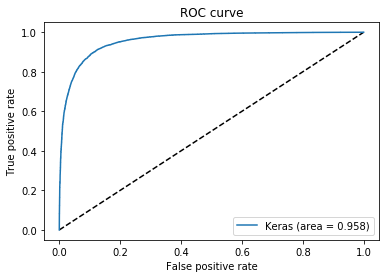

In [13]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### predict test data

In [8]:
# test_data_y = model.predict(test_data_x)

### sava result

In [9]:
# test_id = pd.read_csv('E:\\school\\2-2\\AI\\Project2\\data\\testData.tsv', sep="\t", header=0)

In [10]:
# test_y_path = 'E:\\school\\2-2\\AI\\Project2\\data\\w2vKeras.csv'

In [11]:
# test_id['sentiment'] = test_data_y

In [12]:
# test_id.to_csv(test_y_path, columns=['id', 'sentiment'], index=0)